### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [93]:
data = pd.read_csv('data/coupons.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [95]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)
data.head(10)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [98]:
missing_vals = data.isnull().sum()
missing_vals

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [111]:
# drop 'car' column since most values are NaN
data_clean = data.drop('car', axis=1)
data_clean
data_clean.info()
# drop remaining rows with NA
data_clean = data_clean.dropna()
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

4. What proportion of the total observations chose to accept the coupon?



In [161]:
#Note: will only include observations in clean data set in the calculation below.

result = data_clean['Y'].value_counts()
display(result)
result = data_clean['Y'].value_counts(normalize=True)
display(result)
type(result)
print(f"\nProportion of obsevations with accepted coupon: {result[1]:.3f}")


Y
1    6877
0    5202
Name: count, dtype: int64

Y
1    0.569335
0    0.430665
Name: proportion, dtype: float64


Proportion of obsevations with accepted coupon: 0.569


5. Use a bar plot to visualize the `coupon` column.

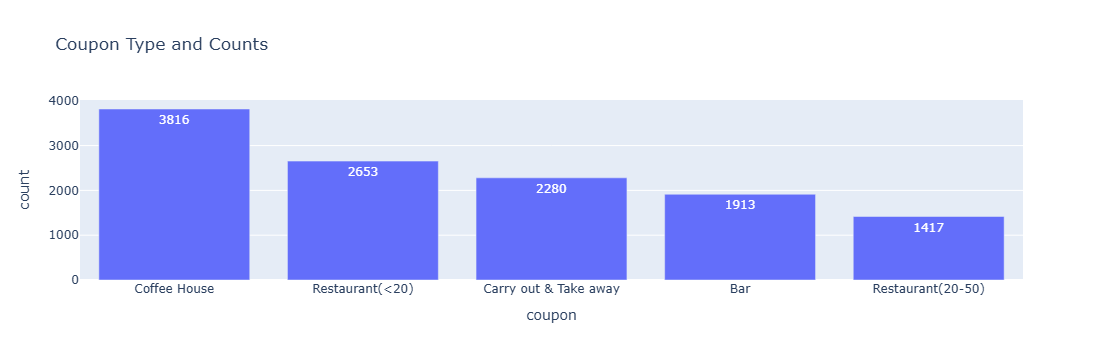

In [433]:
import plotly.express as px

coupon_s = data_clean["coupon"].value_counts()
coupon_df = coupon_s.to_frame().reset_index()
coupon_df
px.bar(coupon_df.sort_values("count", ascending=False), x = "coupon", y="count", title="Coupon Type and Counts", text_auto=True)

#p = sns.barplot(coupon_df, x='coupon', y='count', hue='coupon')
#type(p)
#p.label(title="Penguin species exhibit distinct bill shapes")

6. Use a histogram to visualize the temperature column.

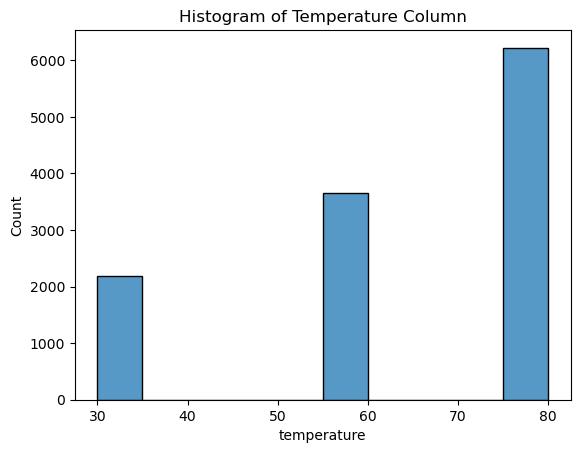

In [437]:
# https://seaborn.pydata.org/examples/histogram_stacked.html

ax = sns.histplot(data_clean, x="temperature", bins=10)

#sns.histplot(    data_clean,     x="temperature", bins=10, hue='coupon')

# Add the title
ax.set_title('Histogram of Temperature Column')

# Show the plot
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [253]:
bar_only = data_clean.query("coupon == 'Bar'")
bar_only

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,0,Some college - no degree,Student,$12500 - $24999,never,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,0,Some college - no degree,Student,$12500 - $24999,never,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [243]:

result = bar_only['Y'].value_counts()
display(result)
result = bar_only['Y'].value_counts(normalize=True)
display(result)
type(result)
print(f"\nProportion of bar coupons accepted: {result[1]:.3f}")


Y
0    1125
1     788
Name: count, dtype: int64

Y
0    0.588082
1    0.411918
Name: proportion, dtype: float64


Proportion of obsevations with accepted coupon: 0.412


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [281]:
counts = bar_only['Bar'].value_counts()
display(counts)
list1 = ["never", "less1", "1~3"]
list2 = ["4~8", "gt8"]
df1 = bar_only.query("Bar in @list1")
result1 = df1["Y"].value_counts(normalize=True)
display(result1)
print(f"\nProportion of bar coupons accepted by those who went 3 or fewer times in bars per month: {result1[1]:.3f}")

df2 = bar_only.query("Bar in @list2")
result2 = df2["Y"].value_counts(normalize=True)
display(result2)
print(f"\nProportion of bar coupons accepted by those who went more than 3 times in bars per month: {result2[1]:.3f}")


Bar
never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: count, dtype: int64

Y
0    0.627326
1    0.372674
Name: proportion, dtype: float64


Proportion of bar coupons accepted by those who went 3 or fewer times in bars per month: 0.373


Y
1    0.761658
0    0.238342
Name: proportion, dtype: float64


Proportion of bar coupons accepted by those who went more than 3 times in bars per month: 0.762


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [383]:
#overall counts
#bar_only.info()
#bar_only["age"] = bar_only["age"].astype("int")
#bar_only.info()
bar_only.age.value_counts()
over_25 = ["26", "31", "50plus", "36", "41", "46"]
gotobar = ["1~3","4~8", "gt8"]
group1 = bar_only.query('age in @over_25 and Bar in @gotobar')
group2 = bar_only.query('age not in @over_25 or Bar not in @gotobar')
display(group2)
count1 = group1["Y"].value_counts(normalize=True)
display(count1)
count2 = group2["Y"].value_counts(normalize=True)
display(count2)

print(f"\nacceptance rate of drivers who go to a bar more than once a month and are over the age of 25: {count1[1]:.3f}")
print(f"acceptance rate of all other drivers: {count2[1]:.3f}")



,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,0,Some college - no degree,Student,$12500 - $24999,never,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,0,Some college - no degree,Student,$12500 - $24999,never,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0


Y
1    0.689826
0    0.310174
Name: proportion, dtype: float64

Y
0    0.662252
1    0.337748
Name: proportion, dtype: float64


acceptance rate of drivers who go to a bar more than once a month and are over the age of 25: 0.690
acceptance rate of all other drivers: 0.338


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [387]:
over_25 = ["26", "31", "50plus", "36", "41", "46"]
counts = bar_only.passanger.value_counts()
display(counts)
gotobar = ["1~3","4~8", "gt8"]
kids = ["Kid(s)"]
occupat = ["farming", "fishing", "forestry"]
group1 = bar_only.query("passanger not in @kids and occupation not in @occupat")
group2 = bar_only.query("passanger in @kids or occupation in @occupat")
display(group2)
count1 = group1["Y"].value_counts(normalize=True)
display(count1)
count2 = group2["Y"].value_counts(normalize=True)
display(count2)

print(f"\nacceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and had occuptions other than farming, fishing or forestry: {count1[1]:.3f}")
print(f"acceptance rate of all other drivers: {count2[1]:.3f}")


passanger
Alone        1141
Friend(s)     318
Partner       260
Kid(s)        194
Name: count, dtype: int64

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,46,Married partner,1,Bachelors degree,Education&Training&Library,$75000 - $87499,less1,1~3,1~3,1~3,less1,1,1,0,0,1,1
141,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,26,Married partner,1,Some college - no degree,Unemployed,$62500 - $74999,never,less1,gt8,4~8,never,1,1,0,0,1,0
268,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,31,Married partner,1,Graduate degree (Masters or Doctorate),Unemployed,$62500 - $74999,never,less1,1~3,less1,less1,1,1,0,0,1,0
290,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,41,Divorced,1,Bachelors degree,Arts Design Entertainment Sports & Media,$12500 - $24999,never,gt8,less1,1~3,never,1,1,0,0,1,0
310,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,41,Married partner,1,Graduate degree (Masters or Doctorate),Education&Training&Library,$50000 - $62499,never,1~3,1~3,1~3,less1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12328,No Urgent Place,Kid(s),Snowy,30,6PM,Bar,1d,Male,31,Married partner,1,Some college - no degree,Computer & Mathematical,$37500 - $49999,never,never,1~3,1~3,1~3,1,0,0,0,1,0
12415,No Urgent Place,Kid(s),Snowy,30,6PM,Bar,1d,Male,31,Married partner,1,Some college - no degree,Protective Service,$100000 or More,1~3,less1,4~8,1~3,4~8,1,0,0,0,1,0
12437,No Urgent Place,Kid(s),Snowy,30,6PM,Bar,1d,Female,50plus,Married partner,1,Bachelors degree,Unemployed,$37500 - $49999,never,less1,1~3,1~3,1~3,1,0,0,0,1,1
12635,No Urgent Place,Kid(s),Snowy,30,6PM,Bar,1d,Female,26,Married partner,1,Bachelors degree,Arts Design Entertainment Sports & Media,$50000 - $62499,never,never,less1,less1,less1,1,0,0,0,1,0


Y
0    0.564863
1    0.435137
Name: proportion, dtype: float64

Y
0    0.793814
1    0.206186
Name: proportion, dtype: float64


acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and had occuptions other than farming, fishing or forestry: 0.435
acceptance rate of all other drivers: 0.206


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [414]:
gotobar = ["1~3","4~8", "gt8"]
kids = ["Kid(s)"]
maritalStatus = ["Widowed"]
under30 = ["below21", "21", "26"]
restaurant_filter = ["4~8", "gt8"]
income_filter = ["$25000 - $37499", "$37500 - $49999"]

counts = bar_only.maritalStatus.value_counts()
counts =bar_only.age.value_counts()
counts = bar_only.RestaurantLessThan20.value_counts()
counts = bar_only.income.value_counts()
display(counts)

group1 = bar_only.query("Bar in @gotobar and passanger not in @kids and maritalStatus not in @maritalStatus")
group2 = bar_only.query("Bar in @gotobar and age in @under30")
group3 = bar_only.query("RestaurantLessThan20 in @restaurant_filter and income in @income_filter")

count1 = group1["Y"].value_counts(normalize=True)
display(count1)
count2 = group2["Y"].value_counts(normalize=True)
display(count2)
count3 = group3["Y"].value_counts(normalize=True)
display(count3)

print(f"\nacceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: {count1[1]:.3f}")
print(f"\nacceptance rate of drivers who go to bars more than once a month and are under the age of 30: {count2[1]:.3f}")
print(f"\nacceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: {count3[1]:.3f}")


income
$25000 - $37499     300
$100000 or More     282
$12500 - $24999     271
$50000 - $62499     249
$37500 - $49999     247
Less than $12500    159
$75000 - $87499     143
$87500 - $99999     133
$62500 - $74999     129
Name: count, dtype: int64

Y
1    0.709434
0    0.290566
Name: proportion, dtype: float64

Y
1    0.719512
0    0.280488
Name: proportion, dtype: float64

Y
0    0.518293
1    0.481707
Name: proportion, dtype: float64


acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 0.709

acceptance rate of drivers who go to bars more than once a month and are under the age of 30: 0.720

acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 0.482


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [445]:
print(""" 
summary of observations:
------------------------
For bar coupons only:
 overall acceptance rate (all drivers): 0.412
 
 These drivers had higher acceptance rates:
 who went more than 3 times in bars per month: 0.762
 who went to bar more than once a month and are over the age of 25: 0.690
 who go to bars more than once a month and had passengers that were not a kid and had occuptions other than farming, fishing or forestry: 0.435
 who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 0.709
 who go to bars more than once a month and are under the age of 30: 0.720
 who go to cheap restaurants more than 4 times a month and income is less than 50K: 0.482

Hypothesis:
-----------
Drivers who accepted bar coupons were likely to to have these characteristics:
 - went to bars more than 3 times per month
 - were under age 30
 - did not have a child (kid) as a passenger
 - did not go to cheap restaurants more than 4 times per month
 - were not in farming, fishing or forestry occupations
 - and had income levels above $50K per year
      """)


 
summary of observations:
------------------------
For bar coupons only:
 overall acceptance rate (all drivers): 0.412
 
 These drivers had higher acceptance rates:
 who went more than 3 times in bars per month: 0.762
 who went to bar more than once a month and are over the age of 25: 0.690
 who go to bars more than once a month and had passengers that were not a kid and had occuptions other than farming, fishing or forestry: 0.435
 who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 0.709
 who go to bars more than once a month and are under the age of 30: 0.720
 who go to cheap restaurants more than 4 times a month and income is less than 50K: 0.482

Hypothesis:
-----------
Drivers who accepted bar coupons were likely to to have these characteristics:
 - went to bars more than 3 times per month
 - were under age 30
 - did not have a child (kid) as a passenger
 - did not go to cheap restaurants more than 4 times per month
 - were not in far

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [519]:
coffee_only = data_clean.query("coupon == 'Coffee House'")
coffee_only
count = coffee_only["Y"].value_counts(normalize=True)

print(f"Overall acceptance rate for coffee coupons: {count[1]:.3f}")

Overall acceptance rate for coffee coupons: 0.496


In [473]:
#overall counts for different groups
#coffee_only.info()
# by gender
count = coffee_only.gender.value_counts()
display(count)
# by education level
count = coffee_only.education.value_counts()
display(count)

# by time of day
count = coffee_only.time.value_counts()
display(count)


gender
Female    1969
Male      1847
Name: count, dtype: int64

education
Some college - no degree                  1328
Bachelors degree                          1276
Graduate degree (Masters or Doctorate)     587
Associates degree                          325
High School Graduate                       272
Some High School                            28
Name: count, dtype: int64

time
6PM     1043
7AM      875
10AM     857
2PM      759
10PM     282
Name: count, dtype: int64

In [521]:
count = coffee_only["Y"].value_counts(normalize=True)
count
print(f"Overall acceptance rate for coffee coupons: {count[1]:.3f}")

Overall acceptance rate for coffee coupons: 0.496


In [525]:
group1 = coffee_only.query("gender == 'Male'")["Y"].value_counts(normalize=True)
display(group1)
group2 = coffee_only.query("gender == 'Female'")["Y"].value_counts(normalize=True)
group2

print(f"Acceptance rate for coffee coupons for Male drivers: {group1[1]:.3f}")
print(f"Acceptance rate for coffee coupons for Female drivers: {group2[1]:.3f}")

Y
1    0.501895
0    0.498105
Name: proportion, dtype: float64

Acceptance rate for coffee coupons for Male drivers: 0.502
Acceptance rate for coffee coupons for Female drivers: 0.491


In [527]:
no_degree = ["Some High School", "High School Graduate", "Some college - no degree" ]
bachelors_or_higher = ["Bachelors degree", "Graduate degree (Masters or Doctorate)"]
count1 = coffee_only.query("education in @no_degree")["Y"].value_counts(normalize=True)
display(count1)
count2 = coffee_only.query("education in @bachelors_or_higher")["Y"].value_counts(normalize=True)
display(count2)

print(f"Acceptance rate for coffee coupons for drivers with no college degree: {count1[1]:.3f}")
print(f"Acceptance rate for coffee coupons for drivers with Bachelors or higher degree: {count2[1]:.3f}")

Y
1    0.52027
0    0.47973
Name: proportion, dtype: float64

Y
0    0.527644
1    0.472356
Name: proportion, dtype: float64

Acceptance rate for coffee coupons for drivers with no college degree: 0.520
Acceptance rate for coffee coupons for drivers with Bachelors or higher degree: 0.472


In [529]:
"""
time
6PM     1043
7AM      875
10AM     857
2PM      759
10PM     282
"""
before_noon = ["7AM", "10AM"]
count1 = coffee_only.query("time in @before_noon")["Y"].value_counts(normalize=True)
display(count1)
count2 = coffee_only.query("time not in @before_noon")["Y"].value_counts(normalize=True)
display(count2)

print(f"Acceptance rate for coffee coupons before noon: {count1[1]:.3f}")
print(f"Acceptance rate for coffee coupons after noon: {count2[1]:.3f}")


Y
1    0.536374
0    0.463626
Name: proportion, dtype: float64

Y
0    0.536948
1    0.463052
Name: proportion, dtype: float64

Acceptance rate for coffee coupons before noon: 0.536
Acceptance rate for coffee coupons after noon: 0.463


In [515]:


print(f"\nacceptance rate of drivers who go to a bar more than once a month and are over the age of 25: {count1[1]:.3f}")
print(f"acceptance rate of all other drivers: {count2[1]:.3f}")



acceptance rate of drivers who go to a bar more than once a month and are over the age of 25: 0.536
acceptance rate of all other drivers: 0.463


In [ ]:
summary of observations:
------------------------
For coffee coupons only:
 overall acceptance rate (all drivers): 0.496
Acceptance rate for coffee coupons for Male drivers: 0.502
Acceptance rate for coffee coupons for Female drivers: 0.491
Acceptance rate for coffee coupons for drivers with no college degree: 0.520
Acceptance rate for coffee coupons for drivers with Bachelors or higher degree: 0.472
Acceptance rate for coffee coupons before noon: 0.536
Acceptance rate for coffee coupons after noon: 0.463

 Drivers who were male with no college degree had slightly higher acceptance rates for coffee coupons if sent by noon.
